In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as dates
import obspy
import obspy.signal.trigger as trigger
from hydrophone_data_processing import load, useful_variables, plotting, signal_processing
import event_detector_pipeline as edp
from ast import literal_eval

hydrophone_metadata = {
    'h1':{
        # start and end identifies the start time of the swarm where the amplitude magnitude is the highest
        'start':obspy.UTCDateTime('2019-05-21T07:35:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T07:48:00Z')
       # obspy_idx is the index within the stream for this data (all data is sorted from top to bottom of the borehole this way in lists)
        ,'obspy_idx':0
        # depth of the hydrophone
        ,'depth':30
        ,'velocity_model':1750
    }
    ,    'h2':{
        'start':obspy.UTCDateTime('2019-05-21T07:35:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T07:48:00Z')
        ,'obspy_idx':1
        ,'depth':100        
        ,'velocity_model':1750

    }
    ,    'h3':{
        'start':obspy.UTCDateTime('2019-05-21T07:35:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T07:48:00Z')
        ,'obspy_idx':2
        ,'depth':170        
        ,'velocity_model':1750

    }
    ,'h4':{
        'start':obspy.UTCDateTime('2019-05-21T07:48:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T08:07:00Z')
        ,'obspy_idx':3
        ,'depth':240
        ,'velocity_model':1750
    }
    ,'h5':{
        'start':obspy.UTCDateTime('2019-05-21T08:07:00Z')
        # ,'end':obspy.UTCDateTime('2019-5-21T08:34:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T08:38:00Z')
        ,'obspy_idx':4
        ,'depth':310
        ,'velocity_model':1750
    }
    ,'h6':{
        'start':obspy.UTCDateTime('2019-05-21T08:34:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T08:38:00Z')
       ,'obspy_idx':5
        ,'depth':380
        ,'velocity_model':1750
    }
}

In [2]:
df = pd.read_csv('precision.csv')
# df['aic_t'] = df.aic_t.apply(lambda x: literal_eval(x))
# df['aics'][5][7:-2].replace('\n','')
df['aic_t'] = df['aic_t'].apply(literal_eval)
df['aics'] = np.array(df['aics'].apply(literal_eval))
df['aic_maxes'] = df['aic_maxes'].apply(literal_eval)

In [3]:
df

,Unnamed: 0,id,depth,relative_depth,radius,aic_t,aics,aic_maxes,first_hydrophone,second_hydrophone,arrival_time,first_arrival,second_arrival,dt,parrival
0,0,0,418.500,108.500,42.013533,"[18037.31817321759, 18037.3181718287, 18037.31...","[-11818.919532274727, -11897.355450596328, -11...","[158, 38, 180, 225, 157, 73]",5,4,18037.318172,2019-05-21 07:38:10.081000+00:00,2019-05-21 07:38:10.165000+00:00,-0.084,2019-05-21 07:38:10.502000+00:00
1,1,1,345.000,35.000,38.194496,"[18037.318188935187, 18037.318188599536, 18037...","[-11346.527262243402, -11411.865881482783, -11...","[198, 169, 198, 239, 77, 77]",4,5,18037.318188,2019-05-21 07:38:11.403000+00:00,2019-05-21 07:38:11.403000+00:00,0.000,2019-05-21 07:38:11.342000+00:00
2,2,2,345.000,35.000,38.194478,"[18037.31820296296, 18037.318202974537, 18037....","[-11737.247555400698, -11802.462266548846, -11...","[182, 183, 182, 227, 49, 49]",4,5,18037.318201,2019-05-21 07:38:12.603000+00:00,2019-05-21 07:38:12.603000+00:00,0.000,2019-05-21 07:38:12.563000+00:00
3,3,3,345.000,35.000,38.194470,"[18037.3182190625, 18037.31821888889, 18037.31...","[-11913.517606890393, -12003.978557313498, -12...","[186, 171, 184, 224, 32, 32]",4,5,18037.318217,2019-05-21 07:38:13.973000+00:00,2019-05-21 07:38:13.973000+00:00,0.000,2019-05-21 07:38:13.943000+00:00
4,4,4,345.000,35.000,38.194478,"[18037.31822136574, 18037.318221331017, 18037....","[-11616.269152776958, -11697.80976516363, -117...","[121, 118, 116, 109, 48, 48]",4,5,18037.318221,2019-05-21 07:38:14.253000+00:00,2019-05-21 07:38:14.253000+00:00,0.000,2019-05-21 07:38:14.213000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236,2236,2236,380.875,70.875,0.954869,"[18037.359563506947, 18037.35956349537, 18037....","[-8390.5797812362, -8482.400680800536, -8496.0...","[196, 195, 344, 276, 237, 196]",5,4,18037.359564,2019-05-21 08:37:46.287000+00:00,2019-05-21 08:37:46.328000+00:00,-0.041,2019-05-21 08:37:46.278000+00:00
2237,2237,2237,380.000,70.000,0.000001,"[18037.35957045139, 18037.35957045139, 18037.3...","[-9400.643148699695, -9478.662600436619, -9501...","[196, 196, 343, 277, 236, 196]",5,4,18037.359570,2019-05-21 08:37:46.887000+00:00,2019-05-21 08:37:46.927000+00:00,-0.040,2019-05-21 08:37:46.876000+00:00
2238,2238,2238,380.000,70.000,-0.000007,"[18037.359578136577, 18037.359578252315, 18037...","[-11623.067589490369, -11689.294866038867, -11...","[187, 197, 341, 275, 234, 194]",5,4,18037.359578,2019-05-21 08:37:47.558000+00:00,2019-05-21 08:37:47.598000+00:00,-0.040,2019-05-21 08:37:47.619000+00:00
2239,2239,2239,379.125,69.125,-0.954846,"[18037.35958925926, 18037.35958923611, 18037.3...","[-9139.835324588068, -9207.91714551809, -9232....","[199, 197, 345, 277, 238, 199]",5,4,18037.359589,2019-05-21 08:37:48.512000+00:00,2019-05-21 08:37:48.551000+00:00,-0.039,2019-05-21 08:37:48.494000+00:00


(-200.0, 800.0)

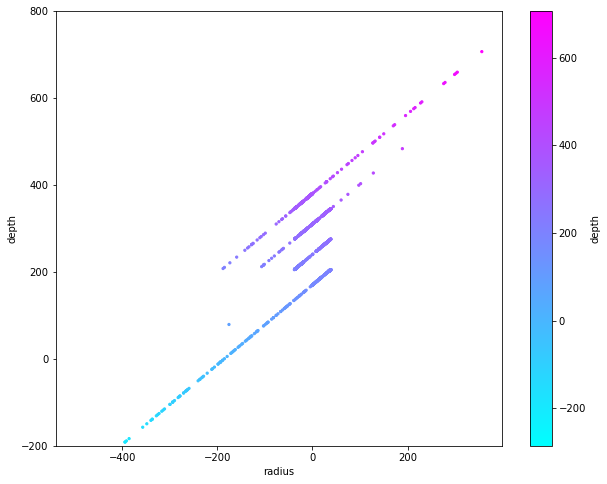

In [4]:
fig, ax = plt.subplots(figsize=(10, 8))

df.plot.scatter(x='radius', y='depth', marker='.', c='depth', ax=ax, cmap='cool')
# ax.set_xscale('log')
ax.set_ylim(-200, 800)

<AxesSubplot:>

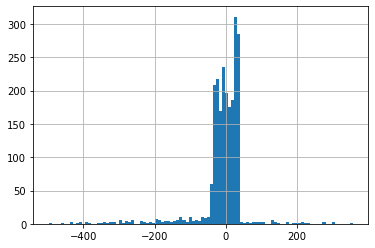

In [5]:
df.radius.hist(bins=100)

Text(0, 0.5, 'cumulative fraction of events')

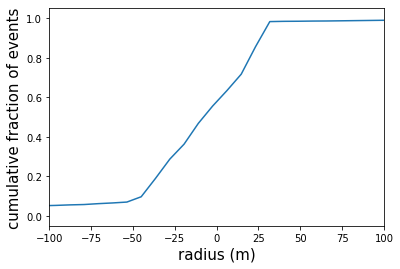

In [6]:
h, e = np.histogram(df.radius, bins=100)

plt.plot(e[:-1], h.cumsum()/h.cumsum().max())
plt.xlim(-100, 100)
plt.xlabel('radius (m)', fontsize=15)
plt.ylabel('cumulative fraction of events', fontsize=15)

In [7]:
# fig, ax = plt.subplots(figsize=(10, 8))

# df.plot.scatter(x='radius', y='depth', marker='.', c='depth', ax=ax, cmap='cool')
# # ax.set_xscale('log')
# # ax.set_xlim(-1, 40)
# # ax.set_ylim(400, 0)

In [8]:
# df.head(1)

In [9]:
# fig, ax = plt.subplots(figsize=(10, 8))

# df.plot.scatter(x='radius', y='depth', marker='.', c='arrival_time', ax=ax, cmap='cool')
# # ax.set_xscale('log')
# # ax.set_xlim(-1, 40)
# # ax.set_ylim(400, 0)

(-100.0, 100.0)

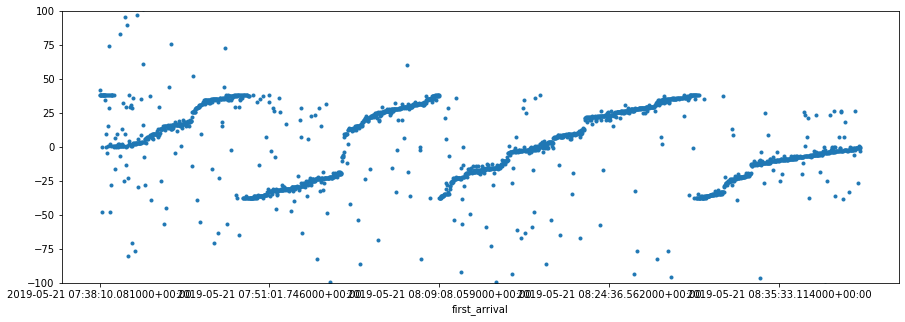

In [10]:
fig, ax = plt.subplots(figsize=(15, 5))

df.set_index('first_arrival').radius.plot(ax=ax, marker='.', linewidth=0)
ax.set_ylim(-100, 100)
# ax.set_xticks([])
# ax.set_xlabel('time ---->', fontsize=15)
# ax.set_ylabel('radius (m)', fontsize=15)

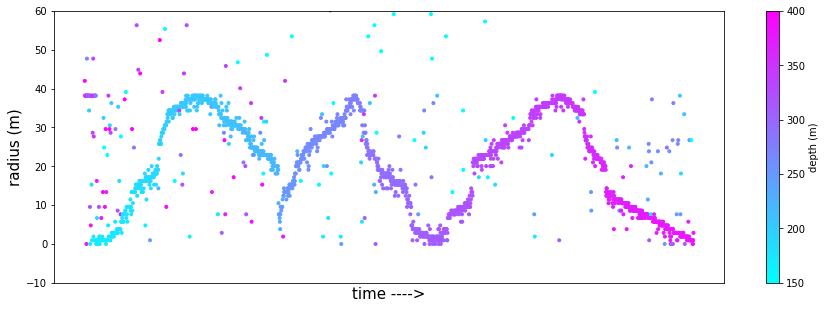

In [30]:
x = df.first_arrival.values
y = np.abs(df.radius.values)
c = df.depth.values

fig, ax = plt.subplots(figsize=(15, 5))
cbar = ax.scatter(x, y, marker='.', c=c, vmin=150, vmax=400, cmap='cool')
ax.set_xticks([])
ax.set_ylim(-10, 60)
ax.set_xlabel('time ---->', fontsize=15)
ax.set_ylabel('radius (m)', fontsize=15)
fig.colorbar(cbar, label='depth (m)')

In [19]:
df.corr()

,Unnamed: 0,id,depth,relative_depth,radius,first_hydrophone,second_hydrophone,arrival_time,dt
Unnamed: 0,1.000000,1.000000,0.301246,-0.145989,-0.243825,0.604117,0.532111,0.991537,-0.121919
id,1.000000,1.000000,0.301246,-0.145989,-0.243825,0.604117,0.532111,0.991537,-0.121919
depth,0.301246,0.301246,1.000000,0.807601,0.691810,0.822284,0.191265,0.307127,0.309902
relative_depth,-0.145989,-0.145989,0.807601,1.000000,0.779914,0.489742,-0.346793,-0.154939,0.261910
radius,-0.243825,-0.243825,0.691810,0.779914,1.000000,0.157944,0.002187,-0.224597,0.451398
first_hydrophone,0.604117,0.604117,0.822284,0.489742,0.157944,1.000000,0.259832,0.597005,0.068042
second_hydrophone,0.532111,0.532111,0.191265,-0.346793,0.002187,0.259832,1.000000,0.572089,-0.016178
arrival_time,0.991537,0.991537,0.307127,-0.154939,-0.224597,0.597005,0.572089,1.000000,-0.115065
dt,-0.121919,-0.121919,0.309902,0.261910,0.451398,0.068042,-0.016178,-0.115065,1.000000


In [29]:
df[df.depth.between(239, 241)]

,Unnamed: 0,id,depth,relative_depth,radius,aic_t,aics,aic_maxes,first_hydrophone,second_hydrophone,arrival_time,first_arrival,second_arrival,dt,parrival
240,240,240,240.875,0.875,0.954869,"[18037.3224712963, 18037.32247133102, 18037.32...","[-12034.606831587025, -12122.983373379415, -12...","[58, 61, 197, 100, 139, 181]",3,4,18037.322472,2019-05-21 07:44:21.562000+00:00,2019-05-21 07:44:21.601000+00:00,-0.039,2019-05-21 07:44:21.553000+00:00
944,944,944,240.000,70.000,-0.000014,"[18037.33834287037, 18037.338342916668, 18037....","[-12103.154827562355, -12174.005220578358, -12...","[81, 85, 145, 105, 197, 151]",3,2,18037.338343,2019-05-21 08:07:12.848000+00:00,2019-05-21 08:07:12.888000+00:00,-0.040,2019-05-21 08:07:12.971000+00:00
2134,2134,2134,240.000,70.000,-0.000006,"[18037.358886331018, 18037.358885474536, 18037...","[-12004.583292986488, -12073.811733615528, -12...","[103, 29, 51, 11, 186, 151]",3,2,18037.358885,2019-05-21 08:36:47.687000+00:00,2019-05-21 08:36:47.727000+00:00,-0.040,2019-05-21 08:36:47.740000+00:00
2161,2161,2161,240.000,0.000,-0.000006,"[18037.359121805555, 18037.359122916667, 18037...","[-12273.642307435079, -12347.737354889621, -12...","[32, 128, 77, 28, 58, 48]",3,5,18037.359122,2019-05-21 08:37:08.120000+00:00,2019-05-21 08:37:08.140000+00:00,-0.020,2019-05-21 08:37:08.177000+00:00


<AxesSubplot:>

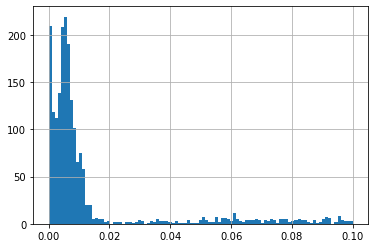

In [37]:
(pd.to_datetime(df.parrival) - pd.to_datetime(df.first_arrival)).abs().apply(lambda x: x.total_seconds()).hist(bins=np.linspace(0, 0.1, 100))

(0.0, 170.0)

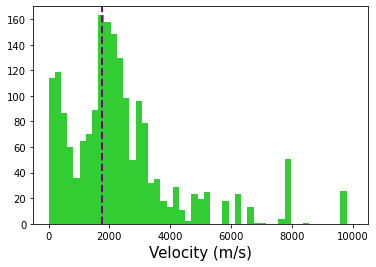

In [72]:
# testing the velocity if the events are right on top of the borehole
df2 = df.copy()
df2['v_next'] = (df2.relative_depth/df2.dt)
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
df2.dropna(subset=['v_next'], inplace=True)
df2['v_next'] = df2.v_next.abs()
fig, ax = plt.subplots()
# h, e = np.histogram(df2.v_next.values, bins=np.linspace(0, 10000, 50))
df2.v_next.hist(bins=np.linspace(0, 10000, 50), grid=False, color='limegreen')
# ax.plot(e[:-1], h/h.sum())
ax.set_xlabel('Velocity (m/s)', fontsize=15)
ax.plot((1750, 1750), (0, 170), color='purple', linewidth=2, linestyle='--')
ax.set_ylim(0, 170)

Text(0.5, 0, 'velocity (m/s)')

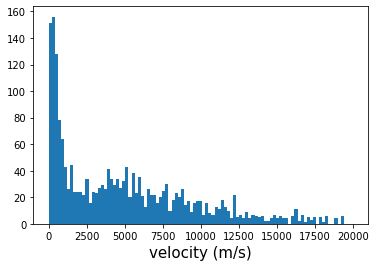

In [105]:
dx = df.relative_depth
dt = (pd.to_datetime(df.first_arrival) - pd.to_datetime(df.parrival)).apply(lambda x: x.total_seconds())
df3 = (dx/dt)
df3.replace([np.inf, -np.inf], np.nan, inplace=True)
df3.dropna(inplace=True)
df3 = df3.abs()
fig, ax = plt.subplots()
df3.hist(bins=np.linspace(0, 20000, 100), grid=False)
ax.set_xlabel('velocity (m/s)', fontsize=15)

In [46]:
# fig = plt.figure(figsize=(10, 10))
# ax = plt.axes(projection='3d')